In [1]:
import pandas as pd
import numpy as np

In [2]:
wine_set_kaggle = pd.read_csv('/kaggle/input/wine-quality-data-set-red-white-wine/wine-quality-white-and-red.csv')
wine_set_kaggle['id'] = pd.Series(np.arange(len(wine_set_kaggle))) + 1
wine_set_kaggle.sample(25)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,id
4683,white,6.5,0.330,0.32,1.0,0.041,39.0,120.0,0.99004,3.06,0.37,12.2,6,4684
1435,white,6.9,0.230,0.24,14.2,0.053,19.0,94.0,0.99820,3.17,0.50,9.6,5,1436
3108,white,7.6,0.350,0.46,14.7,0.047,33.0,151.0,0.99709,3.03,0.53,10.3,5,3109
233,white,7.2,0.230,0.38,14.3,0.058,55.0,194.0,0.99790,3.09,0.44,9.0,6,234
488,white,7.4,0.290,0.29,1.6,0.045,53.0,180.0,0.99360,3.34,0.68,10.5,6,489
1978,white,7.9,0.330,0.26,1.2,0.044,23.0,103.0,0.99320,3.19,0.54,10.5,6,1979
5877,red,12.2,0.450,0.49,1.4,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,5,5878
1685,white,7.2,0.250,0.28,14.4,0.055,55.0,205.0,0.99860,3.12,0.38,9.0,7,1686
2259,white,7.2,0.390,0.54,1.4,0.157,34.0,132.0,0.99449,3.11,0.53,9.0,6,2260
231,white,8.3,0.280,0.40,7.8,0.041,38.0,194.0,0.99760,3.34,0.51,9.6,6,232


In [3]:
#Converting the data set from open ml (arff->csv)
!pip install liac-arff

import arff
import csv

# Load ARFF file
with open('/kaggle/input/wine-set-openml/dataset_.arff', 'r') as arff_file:
    arff_data = arff.load(arff_file)

# Extract data and attributes
data = arff_data['data']
attributes = arff_data['attributes']

# Write data to CSV file
with open('wine_set_openml.csv', 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    
    # Write header row
    writer.writerow([attr[0] for attr in attributes])
    
    # Write data rows
    writer.writerows(data)


  Preparing metadata (setup.py) ... - done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=58b8fcf69ab13e2fdb6b7a39f581af2115868c3952440b2b0a536a03f2c392bb
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built liac-arff


In [4]:
wine_set_openml = pd.read_csv('wine_set_openml.csv')
last_column = wine_set_openml.pop('style')
wine_set_openml.insert(0, 'type', last_column)

wine_set_openml.columns = wine_set_openml.columns.str.replace('_', ' ')
wine_set_openml.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#i just want to compare the values in both datasets
wine_set_kaggle.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,id
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,3249.000000
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,1875.666681
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,1.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1625.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,3249.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,4873.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,6497.000000


In [6]:
wine_set_openml.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


How can booth of them have same values???? huh ???? 🤔

I will proceed working with the data set from kaggle for now.

In [7]:
#i don't think that the quality score from the wine experts is connected with the color of the wine
wine_set_kaggle = wine_set_kaggle.drop(columns=['quality'])

In [8]:
#to check if there are missing values
wine_set_kaggle.isna().sum() #GREAT

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
id                      0
dtype: int64

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'id'}>]], dtype=object)

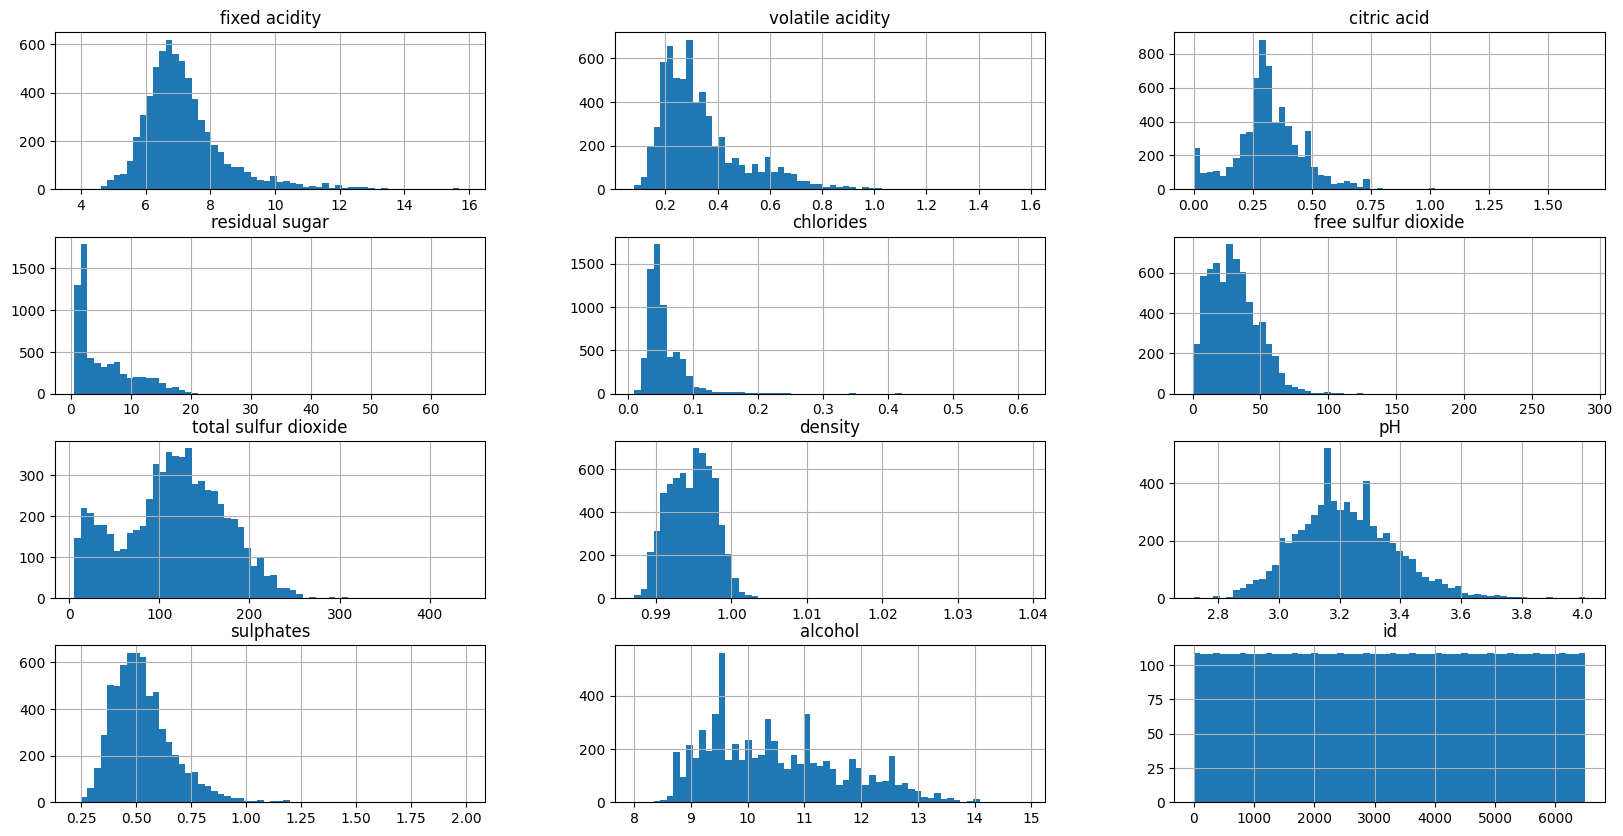

In [9]:
#creating histograms to see the distribution of the values
wine_set_kaggle.hist(bins=60, figsize=(20, 10))

In [10]:
#in the histograms we can see that some values go so far on the x axis, that means that there is at least one row with that value
wine_set_kaggle.describe() #there are some numbers with BIIIGGG differences in min and max in which i am concerned

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,id
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,3249.000000
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,1875.666681
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,1.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,1625.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,3249.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,4873.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,6497.000000


I will now check for the values that seem to have big difference between min and max

In [11]:
#the residual sugar has big difference, according to google it should be max 19
#but it also says that there are some white wines with even 60 g/l of sugar, so i guess we good
#now i want to see how many are there with more than 20g/l of residual sugar
wine_set_kaggle[wine_set_kaggle['residual sugar']>20]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,id
0,white,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1
7,white,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,8
182,white,6.8,0.280,0.40,22.00,0.048,48.0,167.0,1.00100,2.93,0.50,8.7,183
191,white,6.8,0.280,0.40,22.00,0.048,48.0,167.0,1.00100,2.93,0.50,8.7,192
444,white,6.9,0.240,0.36,20.80,0.031,40.0,139.0,0.99750,3.20,0.33,11.0,445
1608,white,6.9,0.270,0.49,23.50,0.057,59.0,235.0,1.00240,2.98,0.47,8.6,1609
1653,white,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,1654
1663,white,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,1664
2620,white,6.5,0.280,0.28,20.40,0.041,40.0,144.0,1.00020,3.14,0.38,8.7,2621
2781,white,7.8,0.965,0.60,65.80,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,2782


<Axes: xlabel='id', ylabel='residual sugar'>

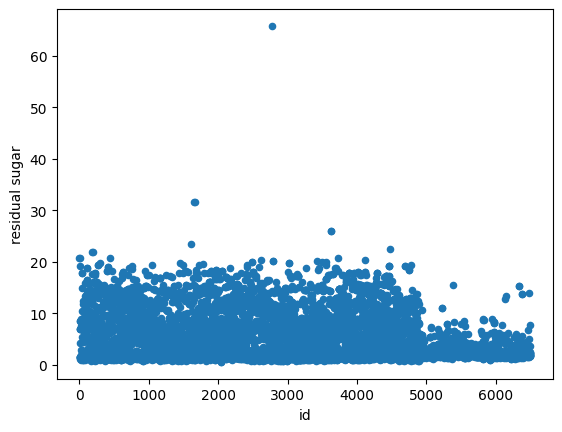

In [12]:
#i think the scatter plots will easily visibly show if there is some outlier
wine_set_kaggle[['id','residual sugar']].plot(kind='scatter', x='id', y='residual sugar')

In [13]:
#i decided to remove it because is double of the biggest before it
wine_set_kaggle = wine_set_kaggle[wine_set_kaggle['residual sugar']<=35.00]

In [14]:
wine_set_kaggle[wine_set_kaggle['free sulfur dioxide']>150]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,id
4745,white,6.1,0.26,0.25,2.9,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,4746


<Axes: xlabel='id', ylabel='free sulfur dioxide'>

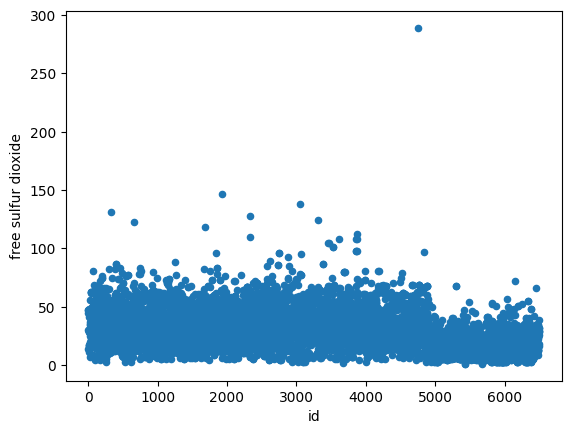

In [15]:
#i just read that to have this much free so2 in wine is possible, but i will delete it anyways
wine_set_kaggle[['id','free sulfur dioxide']].plot(kind='scatter', x='id', y='free sulfur dioxide') 

In [16]:
wine_set_kaggle = wine_set_kaggle[wine_set_kaggle['free sulfur dioxide'] <= 150]

<Axes: xlabel='id', ylabel='citric acid'>

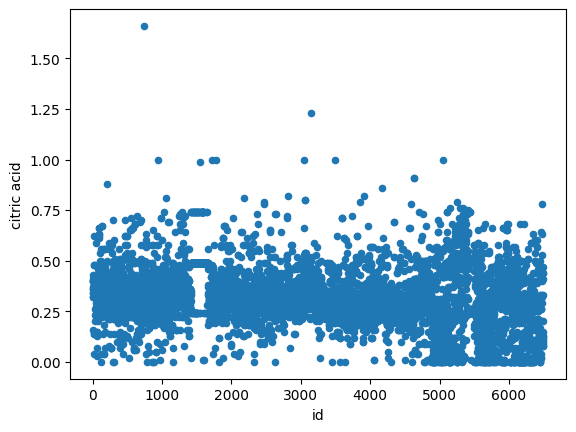

In [17]:
wine_set_kaggle[['id','citric acid']].plot(kind='scatter', x='id', y='citric acid') 

In [18]:
#wine_set_kaggle = wine_set_kaggle[wine_set_kaggle['citric acid'] <= 1.50]

<Axes: xlabel='id', ylabel='volatile acidity'>

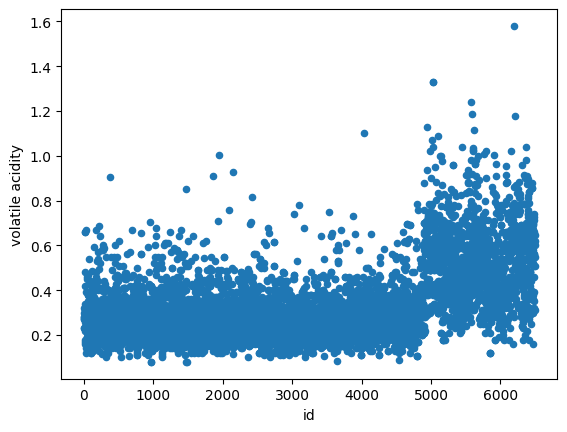

In [19]:
wine_set_kaggle[['id','volatile acidity']].plot(kind='scatter', x='id', y='volatile acidity') 

In [20]:
wine_set_kaggle[wine_set_kaggle['total sulfur dioxide']>350] 
#wine_set_kaggle[['id','total sulfur dioxide']].plot(kind='scatter', x='id', y='total sulfur dioxide') 

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,id
1417,white,8.6,0.55,0.35,15.55,0.057,35.5,366.5,1.0001,3.04,0.63,11.0,1418


In [21]:
#the max legal limit of total SO2 is 350mg/l, but 366.6 is not that far, so i won't delete it

<Axes: xlabel='id', ylabel='sulphates'>

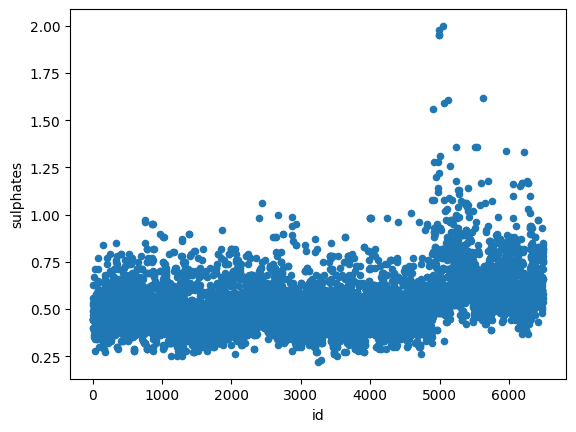

In [22]:
wine_set_kaggle[['id','sulphates']].plot(kind='scatter', x='id', y='sulphates') 

In [23]:
wine_set_kaggle['type'].value_counts()

type
white    4896
red      1599
Name: count, dtype: int64

In [24]:
#there are a lot more white wines 
white_wines = wine_set_kaggle[wine_set_kaggle['type'] == 'white']

duplicate_rows = white_wines[white_wines.duplicated()]

if duplicate_rows.empty:
    print("No duplicate rows found in white wine data.")
else:
    print("Duplicate rows found in white wine data:")
    print(duplicate_rows)

No duplicate rows found in white wine data.


In [25]:
additional_white_samples = wine_set_kaggle[wine_set_kaggle['type'] == 'red'].sample(n=1000, replace=True)
wine_set_kaggle = pd.concat([wine_set_kaggle, additional_white_samples])

remove_indices = wine_set_kaggle[wine_set_kaggle['type'] == 'white'].sample(frac=0.3).index
wine_set_kaggle = wine_set_kaggle.drop(remove_indices)

In [26]:
wine_set_kaggle['type'].value_counts()

type
white    3427
red      2599
Name: count, dtype: int64